# Exploratory Data Analysis - Data mining Team 6

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

# pd.set_option('display.max_rows', None)

pd.set_option('max_colwidth',100)

## 1. Initial look on data

PMData contains sports activity logging data collected from 16 persons. The data is collected for five months from the start of November 2019 to the end of March 2020. The participants range from many different kind of background with regards to training and exercises. Some are active athletes, some previous athletes, and some rarely exercised at all.

In [2]:
participants = pd.read_excel('../osfstorage-archive/pmdata/participant-overview.xlsx', header = 1)

In [3]:
display(participants)

,Participant ID,Age,Height,Gender,A or B person,Max heart rate,Date,Minutes,Seconds,Stride walk,Stride run
0,p01,48,195,male,A,182,2019-11-26 00:00:00,29,33,80.90,102.9
1,p02,60,180,male,A,169,2019-12-15 00:00:00,23,51,74.70,92.4
2,p03,25,184,male,A,157,2019-12-30 00:00:00,33,22,NaN,NaN
3,p04,26,163,female,A,195,2019-11-19 00:00:00,22,13,67.30,110.2
4,p05,35,176,male,A,184,2019-12-23 00:00:00,32,40,73.00,94.3
5,p06,42,179,male,B,181,2019-12-01 00:00:00,23,19,73.04,97.6
6,p07,26,177,male,B,NaN,2019-11-19 00:00:00,19,40,73.50,119.5
7,p08,27,186,male,B,200,2019-11-28 00:00:00,18,47,77.20,103.6
8,p09,26,180,male,B,183,2020-01-07 00:00:00,35,6,74.70,109.9
9,p10,38,179,female,B,197,2019-12-08 00:00:00,28,10,73.09,102.3


Based on the participants overview excel, the datasets have 16 participants in total. Twelve men and three women, in the age range 25–60 years, with an average age of 34 years.

#### Action:

1. Use <b>Participant ID, Age, Height, and Gender</b> attributes.
2. Drop <b>A or B person, Max heart rate, Date, Minutes, Seconds, Stride walk, Stride run</b> attributes.

Each participant has several folders that contains several datasets which are:

Fitbit
* Calories
* Distances
* Exercise
* Heart Rate
* Lightly Active Minutes
* Moderately Active Minutes
* Resting Heart Rate
* Sedentary Minutes
* Sleep Score
* Sleep
* Steps
* Time In Heart Rate Zones
* Very Active Minutes

Food Images
* Several images

Googledocs
* Reporting

Pmsys
* Welnness
* Injury
* Srpe

### Person 1 Fitbit Data:

In [4]:
calories1 = pd.read_json('../osfstorage-archive/pmdata/p01/fitbit/calories.json')
distance1 = pd.read_json('../osfstorage-archive/pmdata/p01/fitbit/distance.json')
exercise1 = pd.read_json('../osfstorage-archive/pmdata/p01/fitbit/exercise.json')
heart_rate1 = pd.read_json('../osfstorage-archive/pmdata/p01/fitbit/heart_rate.json')
lightly_active_minutes1 = pd.read_json('../osfstorage-archive/pmdata/p01/fitbit/lightly_active_minutes.json')
moderately_active_minutes1 = pd.read_json('../osfstorage-archive/pmdata/p01/fitbit/moderately_active_minutes.json')
resting_heart_rate1 = pd.read_json('../osfstorage-archive/pmdata/p01/fitbit/resting_heart_rate.json')
sedentary_minutes1 = pd.read_json('../osfstorage-archive/pmdata/p01/fitbit/sedentary_minutes.json')
sleep_score1 = pd.read_csv('../osfstorage-archive/pmdata/p01/fitbit/sleep_score.csv')
sleep1 = pd.read_json('../osfstorage-archive/pmdata/p01/fitbit/sleep.json')
steps1 = pd.read_json('../osfstorage-archive/pmdata/p01/fitbit/steps.json')
time_in_heart_rate_zones1 = pd.read_json('../osfstorage-archive/pmdata/p01/fitbit/time_in_heart_rate_zones.json')
very_active_minutes1 = pd.read_json('../osfstorage-archive/pmdata/p01/fitbit/very_active_minutes.json')

In [5]:
calories1.head()

,dateTime,value
0,2019-11-01 00:00:00,1.39
1,2019-11-01 00:01:00,1.39
2,2019-11-01 00:02:00,1.39
3,2019-11-01 00:03:00,1.39
4,2019-11-01 00:04:00,1.39


#### Calories
Calories table shows how many calories the person has burned the last minute.

##### Action: 
1. Sum <b>value</b> attribute in a day and use the value per day.
2. Set <b>dateTime</b> attribute per day as key index

In [6]:
distance1.head()

,dateTime,value
0,2019-11-01 00:00:00,0
1,2019-11-01 00:01:00,0
2,2019-11-01 00:02:00,0
3,2019-11-01 00:03:00,0
4,2019-11-01 00:04:00,0


#### Distance
Distance table shows distance moved per minute in centimeters.

##### Action: 
1. Sum <b>value</b> attribute in a day and use the value per day.
2. Set <b>dateTime</b> attribute per day as key index

In [7]:
exercise1.head()

,logId,activityName,activityTypeId,activityLevel,averageHeartRate,calories,duration,activeDuration,steps,logType,manualValuesSpecified,heartRateZones,lastModified,startTime,originalStartTime,originalDuration,elevationGain,hasGps,shouldFetchDetails,distance,distanceUnit,source,tcxLink,speed,pace,vo2Max
0,26451905128,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minutes': 0, 'name': 'lightly'}, {'minutes': 8, 'name': ...",94,192,1331000,1331000,1878,auto_detected,"{'calories': False, 'distance': False, 'steps': False}","[{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 1}, {'name': 'Fat Burn', 'min': 86, '...",11/01/19 15:29:27,2019-11-01 14:56:32,11/01/19 14:56:32,1331000,24.384,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26455950499,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minutes': 1, 'name': 'lightly'}, {'minutes': 12, 'name':...",94,302,2202000,2202000,2786,auto_detected,"{'calories': False, 'distance': False, 'steps': False}","[{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 4}, {'name': 'Fat Burn', 'min': 86, '...",11/01/19 19:53:36,2019-11-01 19:03:11,11/01/19 19:03:11,2202000,27.432,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,26467488515,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minutes': 0, 'name': 'lightly'}, {'minutes': 11, 'name':...",98,354,2458000,2458000,3035,auto_detected,"{'calories': False, 'distance': False, 'steps': False}","[{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 0}, {'name': 'Fat Burn', 'min': 86, '...",11/02/19 14:31:32,2019-11-02 13:26:38,11/02/19 13:26:38,2458000,21.336,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26520401069,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minutes': 1, 'name': 'lightly'}, {'minutes': 7, 'name': ...",97,145,1024000,1024000,1284,auto_detected,"{'calories': False, 'distance': False, 'steps': False}","[{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 1}, {'name': 'Fat Burn', 'min': 86, '...",11/04/19 21:56:40,2019-11-04 21:22:08,11/04/19 21:22:08,1024000,21.336,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26538035127,Walk,90013,"[{'minutes': 3, 'name': 'sedentary'}, {'minutes': 13, 'name': 'lightly'}, {'minutes': 0, 'name':...",93,121,973000,973000,1065,auto_detected,"{'calories': False, 'distance': False, 'steps': False}","[{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 3}, {'name': 'Fat Burn', 'min': 86, '...",11/05/19 19:57:44,2019-11-05 19:27:25,11/05/19 19:27:25,973000,3.048,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Exercise
Distance table describes each activity in more detail. It contains the date with start and stop time, time in different activity levels, type of activity, and various performance metrics depending on the type of exercise, e.g., for running, it contains distance, time, steps, calories, speed, and pace.

##### Action: 
1.

In [8]:
heart_rate1.head()

,dateTime,value
0,2019-11-01 00:00:05,"{'bpm': 54, 'confidence': 3}"
1,2019-11-01 00:00:10,"{'bpm': 52, 'confidence': 3}"
2,2019-11-01 00:00:20,"{'bpm': 51, 'confidence': 3}"
3,2019-11-01 00:00:25,"{'bpm': 52, 'confidence': 3}"
4,2019-11-01 00:00:30,"{'bpm': 51, 'confidence': 3}"


#### Heart Rate 
Heart rate table shows the number of heart beats perminute(bpm) at a given time.

##### Action: 
1. Heart rate data will not be used.

In [9]:
lightly_active_minutes1.head() #sum of the number of lightly active minutes per day

,dateTime,value
0,2019-11-01,245
1,2019-11-02,202
2,2019-11-03,262
3,2019-11-04,230
4,2019-11-05,263


#### Lightly Active Minutes
Lightly Active Minutes table sums up the number of lightly active minutes per day.

##### Action: 
1. Use <b>value</b> attribute.
2. Set <b>dateTime</b> attribute as key index

In [10]:
moderately_active_minutes1.head()

,dateTime,value
0,2019-11-01,58
1,2019-11-02,43
2,2019-11-03,63
3,2019-11-04,23
4,2019-11-05,22


#### Moderately Active Minutes
Moderately Active Minutes table sums up the number of mod- erately active minutes per day.

##### Action: 
1. Use <b>value</b> attribute.
2. Set <b>dateTime</b> attribute as key index

In [11]:
resting_heart_rate1.head()

,dateTime,value
0,2019-11-01,"{'date': '11/01/19', 'value': 53.74107360839844, 'error': 6.7911224365234375}"
1,2019-11-02,"{'date': '11/02/19', 'value': 52.881497383117676, 'error': 6.788424491882324}"
2,2019-11-03,"{'date': '11/03/19', 'value': 53.22202396392822, 'error': 6.787530899047852}"
3,2019-11-04,"{'date': '11/04/19', 'value': 54.31114101409912, 'error': 6.787234306335449}"
4,2019-11-05,"{'date': '11/05/19', 'value': 52.25911045074463, 'error': 6.787136077880859}"


In [12]:
resting_heart_rate1['value'][0] #date, error can be dropped. leave value under value col

{'date': '11/01/19', 'value': 53.74107360839844, 'error': 6.7911224365234375}

#### Resting Heart Rate
Resting Heart Rate table gives the resting heart rate per day.

##### Action: 
1. Use <b>value.value</b> attribute. 
2. Drop <b>date, error</b> attributes.
3. Set <b>dateTime</b> attribute as key index

In [13]:
sedentary_minutes1.head() # sedentary - sleep might show how inactive a person was during the day

,dateTime,value
0,2019-11-01,636
1,2019-11-02,709
2,2019-11-03,648
3,2019-11-04,760
4,2019-11-05,737


#### Sedentary Minutes
Sedentary table sums up the number of sedentary minutes per day.

##### Action: 
1. Use <b>value</b> attribute. 
2. Set <b>dateTime</b> as key index

In [14]:
sleep_score1.head()

,timestamp,sleep_log_entry_id,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,2019-11-01T06:29:30Z,24472394143,76,18,20,38,27,53,0.053635
1,2019-11-02T07:19:30Z,24486013387,79,20,22,37,36,53,0.078978
2,2019-11-03T07:34:30Z,24497341340,71,16,17,38,38,52,0.093491
3,2019-11-04T06:35:00Z,24507914069,68,15,15,38,37,53,0.064851
4,2019-11-05T06:25:00Z,24521896102,73,15,22,36,26,54,0.093185


#### Sleep Score
Sleep Score table contains an overall 0-100 score calculated from the composition, revitalization and duration scores, the number of deep sleep minutes, the resting heart rate, and a restlessness score per night.

##### Action: 
1. Use <b>overall_score, composition_score, revitalization_score, duration_score, deep_sleep_in_minutes, resting_heart_rate, restlessness</b> attributes. 
2. Drop <b>sleep_log_entry_id</b> attribute.
3. Set <b>timestamp</b> attribute as key index.

In [15]:
sleep1.head()

,logId,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,levels,mainSleep
0,24486013387,2019-11-02,2019-11-02 00:09:30,2019-11-02T07:19:30.000,25800000,0,378,52,0,430,97,stages,0,"{'summary': {'deep': {'count': 2, 'minutes': 36, 'thirtyDayAvgMinutes': 40}, 'wake': {'count': 2...",True
1,24497341340,2019-11-03,2019-11-03 00:32:00,2019-11-03T07:34:30.000,25320000,0,378,44,0,422,96,stages,0,"{'summary': {'deep': {'count': 2, 'minutes': 38, 'thirtyDayAvgMinutes': 40}, 'wake': {'count': 2...",True
2,24507914069,2019-11-04,2019-11-03 23:55:30,2019-11-04T06:35:00.000,23940000,0,361,38,0,399,96,stages,0,"{'summary': {'deep': {'count': 2, 'minutes': 37, 'thirtyDayAvgMinutes': 40}, 'wake': {'count': 2...",True
3,24521896102,2019-11-05,2019-11-05 00:22:30,2019-11-05T06:25:00.000,21720000,0,326,36,1,362,99,stages,0,"{'summary': {'deep': {'count': 1, 'minutes': 27, 'thirtyDayAvgMinutes': 39}, 'wake': {'count': 2...",True
4,24534036899,2019-11-06,2019-11-06 00:25:30,2019-11-06T06:29:30.000,21840000,0,341,23,1,364,99,stages,0,"{'summary': {'deep': {'count': 2, 'minutes': 66, 'thirtyDayAvgMinutes': 39}, 'wake': {'count': 2...",True


#### Sleep
Sleep table is a per sleep breakdown of the sleep into periods of light, deep, REM sleeps, and time awake.

##### Action: 
1. Use <b>duration, minutesToFallAsleep, minutesAsleep, minutesAwake, minutesAfterWakeup, timeInBed, efficiency</b> attributes. 
2. Drop <b>logId, startTime, endTime, type, infoCode, levels, mainSleep</b> attributes.
3. Set <b>dateOfSleep</b> attribute as key index

In [16]:
steps1.head() #per hours -> can be transformed into per day

,dateTime,value
0,2019-11-01 00:00:00,0
1,2019-11-01 00:01:00,0
2,2019-11-01 00:02:00,0
3,2019-11-01 00:03:00,0
4,2019-11-01 00:04:00,0


#### Steps
Steps table displays the number of steps per minute.

##### Action: 
1. Sum <b>value</b> attribute in a day and use the value per day.
2. Set <b>dateTime</b> attribute per day as key index

In [17]:
time_in_heart_rate_zones1.head()

,dateTime,value
0,2019-11-01,"{'valuesInZones': {'BELOW_DEFAULT_ZONE_1': 1254.0, 'IN_DEFAULT_ZONE_1': 164.0, 'IN_DEFAULT_ZONE_..."
1,2019-11-02,"{'valuesInZones': {'IN_DEFAULT_ZONE_2': 0.0, 'IN_DEFAULT_ZONE_3': 0.0, 'IN_DEFAULT_ZONE_1': 137...."
2,2019-11-03,"{'valuesInZones': {'IN_DEFAULT_ZONE_3': 0.0, 'IN_DEFAULT_ZONE_1': 141.0, 'IN_DEFAULT_ZONE_2': 0...."
3,2019-11-04,"{'valuesInZones': {'IN_DEFAULT_ZONE_1': 100.0, 'BELOW_DEFAULT_ZONE_1': 1315.0, 'IN_DEFAULT_ZONE_..."
4,2019-11-05,"{'valuesInZones': {'IN_DEFAULT_ZONE_2': 7.0, 'IN_DEFAULT_ZONE_3': 12.0, 'IN_DEFAULT_ZONE_1': 94...."


In [18]:
pd.DataFrame([eval(str(a).replace('{\'valuesInZones\': ','').replace('}}','}')) for a in time_in_heart_rate_zones1['value']])

,BELOW_DEFAULT_ZONE_1,IN_DEFAULT_ZONE_1,IN_DEFAULT_ZONE_3,IN_DEFAULT_ZONE_2
0,1254.0,164.0,0.0,3.0
1,1262.0,137.0,0.0,0.0
2,1218.0,141.0,0.0,0.0
3,1315.0,100.0,0.0,0.0
4,1300.0,94.0,12.0,7.0
...,...,...,...,...
147,1347.0,82.0,0.0,3.0
148,1232.0,173.0,0.0,5.0
149,1319.0,49.0,0.0,0.0
150,1384.0,23.0,0.0,2.0


#### Heart Rate Zone
Heart Rate Zone table gives the number of minutes in different heart rate zones.

##### Action: 
1. Use <b>value.value</b> attribute. 
2. Drop <b>date</b> and <b>error</b> attributes.
3. Set <b>dateTime</b> attribute as key index

In [19]:
very_active_minutes1.head()

,dateTime,value
0,2019-11-01,72
1,2019-11-02,56
2,2019-11-03,45
3,2019-11-04,28
4,2019-11-05,56


#### Very Active Minutes
Very Active Minutes table sums up the number of very active minutes per day.

##### Action: 
1. Use <b>value</b> attribute.
2. Set <b>dateTime</b> attribute as key index

### Person 1 Food Images Data:

#### Food Images
Food images only contains images without any data.

##### Action: 
1. Food images will not be used.


### Person 1 Googledocs:

In [20]:
reporting1 = pd.read_csv('../osfstorage-archive/pmdata/p01/googledocs/reporting.csv')

In [21]:
reporting1.head()

,date,timestamp,meals,weight,glasses_of_fluid,alcohol_consumed
0,06/11/2019,06/12/2019 21:58:30,"Breakfast, Dinner",100.0,7,No
1,09/11/2019,09/12/2019 21:17:02,"Breakfast, Evening",100.0,6,No
2,10/11/2019,10/12/2019 21:52:58,"Breakfast, Lunch, Dinner",100.0,9,No
3,11/11/2019,11/11/2019 22:36:30,"Breakfast, Dinner",100.0,5,No
4,12/11/2019,13/11/2019 00:15:47,"Breakfast, Lunch, Dinner",100.0,7,No


#### Reporting
Food images only contains daily reporting data. The data file contains one line per report, including the date reported for, timestamp of the report submission time, the eaten meals (breakfast, lunch, dinner, and evening meal), the participants weigh this day, the number of glasses drunk, and whether one has consumed alcohol.

##### Action: 
1. 

### Person 1 Pmsys:

In [22]:
wellness1 = pd.read_csv('../osfstorage-archive/pmdata/p01/pmsys/wellness.csv')
srpe1 = pd.read_csv('../osfstorage-archive/pmdata/p01/pmsys/srpe.csv')
injury1 = pd.read_csv('../osfstorage-archive/pmdata/p01/pmsys/injury.csv')

In [23]:
wellness1.head()

,effective_time_frame,fatigue,mood,readiness,sleep_duration_h,sleep_quality,soreness,soreness_area,stress
0,2019-11-01T08:31:40.751Z,2,3,5,6,3,2,[12921003],3
1,2019-11-02T10:00:01.229Z,2,3,6,6,3,2,[12921003],3
2,2019-11-03T14:28:03.263Z,3,3,8,6,3,3,[],3
3,2019-11-04T07:05:28.429Z,3,3,8,6,3,3,[],3
4,2019-11-05T06:13:35.998Z,3,3,8,5,3,3,[],3


#### Wellness
Wellness table includes parameters like time and date, fatigue, mood, readiness, sleep duration (number of hours), sleep quality, soreness (and soreness area), and stress.  Since this table filled subjectively by each participant, we will choose one of the attribute as our target data.

##### Action: 
1. Use <b>readiness</b> attribute as our target data. 
2. Drop <b>fatigue, mood, sleep_duration_h, sleep_quality, soreness, soreness_area, stress</b> attributes.
3. Set <b>effective_time_frame</b> attribute as key index

In [24]:
srpe1.head()

,end_date_time,activity_names,perceived_exertion,duration_min
0,2019-11-05T22:51:54.710Z,"['individual', 'running']",7,30
1,2019-11-11T21:15:15.092Z,"['individual', 'running']",6,30
2,2019-11-14T21:00:53.000Z,"['team', 'soccer']",7,60
3,2019-11-18T21:34:44.995Z,"['individual', 'endurance']",6,50
4,2019-11-21T21:06:25.146Z,"['team', 'soccer']",6,70


#### SRPE
SRPE table contains a training session’s end-time, type of activity, the perceived exertion (RPE), and the duration in the number of minutes. 

##### Action: 
1. 

In [25]:
injury1.head()

,effective_time_frame,injuries
0,2019-11-07T06:39:48.428Z,{}
1,2019-11-11T13:47:05.617Z,{}
2,2019-11-18T08:28:53.208Z,{}
3,2019-11-25T08:10:11.478Z,{}
4,2019-12-02T08:10:19.841Z,{}


#### Injury
Injury table shows injuries with a time and date and corresponding injury locations and a minor and major severity.

##### Action: 
1. 

## 2. Data Cleaning

In [26]:
from ipynb.fs.full.data_preprocessing_function import preprocessing_data

### Process data cleaning for each participant
1. Only Calories, Distance, Lightly Active Minutes, Moderately Active Minutes, Resting Heart Rate, Sedentary Minutes, Sleep Score, Sleep, Steps, Time In Heart Rate Zones, Very Active Minutes, Wellness data will be used
2. If participant does not have complete datasets above, participant data will not be used at all
3. Process each table:
    1. Sum Calories, Distance, Steps values per day
    2. Process Resting Heart Rate to data frame
    3. Delete time in Sleep Score Timestamp and drop unnecessary columns in Sleep Score table
    4. Process Heart Rate Zone to data frame
    5. Set all table data index with date
    6. Drop unnecessary columns in sleep table
    7. Create Readiness column as prediction target from Wellness table
    8. Drop duplicate records
    9. Merge all table data for each participant into one big table
    
       <b>Since we will use yesterday's data to predict today's Readiness, we will shift Readiness to one day before<b/>
    10. Shift readiness value to one day before
    11. Drop row for missing readiness score
    12. Merge Age, Height, Gender data from Participant Overview table to each participant
    13. Add days column indicator


In [27]:
overview = pd.read_excel('../osfstorage-archive/pmdata/participant-overview.xlsx')
overview = overview.set_axis(overview.iloc[0,:],axis='columns').set_index('Participant ID',drop=True)

array_cleaned_participants_data = []
for x in range(1, 17):
    person_number = x
    
    person_number = str('%02d' % person_number)

    calories = []
    distance = []
    l_act = []
    m_act = []
    r_heart = []
    sedentary = []
    sleep_score = []
    sleep = []
    hr_zone = []
    v_act = []
    wellness = []
    
    display('P'+person_number)
    
    complete_datasets = False
    
    try:
        calories = pd.read_json('../osfstorage-archive/pmdata/p'+person_number+'/fitbit/calories.json')
        distance = pd.read_json('../osfstorage-archive/pmdata/p'+person_number+'/fitbit/distance.json')
        l_act = pd.read_json('../osfstorage-archive/pmdata/p'+person_number+'/fitbit/lightly_active_minutes.json')
        m_act = pd.read_json('../osfstorage-archive/pmdata/p'+person_number+'/fitbit/moderately_active_minutes.json')
        r_heart = pd.read_json('../osfstorage-archive/pmdata/p'+person_number+'/fitbit/resting_heart_rate.json')
        sedentary = pd.read_json('../osfstorage-archive/pmdata/p'+person_number+'/fitbit/sedentary_minutes.json')
        sleep_score = pd.read_csv('../osfstorage-archive/pmdata/p'+person_number+'/fitbit/sleep_score.csv')
        sleep = pd.read_json('../osfstorage-archive/pmdata/p'+person_number+'/fitbit/sleep.json')
        steps = pd.read_json('../osfstorage-archive/pmdata/p'+person_number+'/fitbit/steps.json')
        hr_zone = pd.read_json('../osfstorage-archive/pmdata/p'+person_number+'/fitbit/time_in_heart_rate_zones.json')
        v_act = pd.read_json('../osfstorage-archive/pmdata/p'+person_number+'/fitbit/very_active_minutes.json')
        wellness = pd.read_csv('../osfstorage-archive/pmdata/p'+person_number+'/pmsys/wellness.csv')  
                
        complete_datasets = True
        print('Complete datasets, process DATA CLEANING...')
            
    except:
        print('Exception from loading files')
        print('Participant data will not be used')
        pass
    
    if complete_datasets:
        data_cleaning_result = preprocessing_data(person_number, calories, distance, l_act, m_act, r_heart, sedentary, sleep_score, sleep, steps, hr_zone, v_act, wellness)
    
        #handling missing values
        data_cleaning_result['readiness'] = data_cleaning_result['readiness'].shift(periods=-1) #shift next date's readiness to current date
        print('Shift readiness value to one day before')
        data_cleaning_result = data_cleaning_result[data_cleaning_result['readiness'].notna()] #drop missing values on readiness
        print('Drop row for missing readiness score')

        #add age, height, gender data
        data_cleaning_result['age'] = overview.loc['p'+person_number,'Age']
        data_cleaning_result['height'] = overview.loc['p'+person_number,'Height']
        if overview.loc['p'+person_number,'Gender'] == 'male':
            data_cleaning_result['gender'] = 0
        else:
            data_cleaning_result['gender'] = 1
        print('Merge Age, Height, Gender data from Participant Overview table to each participant')

        #add weekend/weekdays dummy variable
        week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

        for i, x in enumerate(week):
            data_cleaning_result[x] = (data_cleaning_result.index.get_level_values(0).weekday == i).astype(int)
        print('Add days column indicator')
        
        
        array_cleaned_participants_data.append(data_cleaning_result)




'P01'

Complete datasets, process DATA CLEANING...
Sum Calories, Distance, Steps values per day
Process Resting Heart Rate to data frame
Delete time in Sleep Score Timestamp and drop unnecessary columns in Sleep Score table
Process Heart Rate Zone to data frame
Set all table data index with date
Drop unnecessary columns in Sleep table
Create Readiness column as prediction target from Wellness table
Drop duplicate records
Merge all table data for participant 01 into one big table
Shift readiness value to one day before
Drop row for missing readiness score
Merge Age, Height, Gender data from Participant Overview table to each participant
Add days column indicator


'P02'

Complete datasets, process DATA CLEANING...
Sum Calories, Distance, Steps values per day
Process Resting Heart Rate to data frame
Delete time in Sleep Score Timestamp and drop unnecessary columns in Sleep Score table
Process Heart Rate Zone to data frame
Set all table data index with date
Drop unnecessary columns in Sleep table
Create Readiness column as prediction target from Wellness table
Drop duplicate records
Merge all table data for participant 02 into one big table
Shift readiness value to one day before
Drop row for missing readiness score
Merge Age, Height, Gender data from Participant Overview table to each participant
Add days column indicator


'P03'

Complete datasets, process DATA CLEANING...
Sum Calories, Distance, Steps values per day
Process Resting Heart Rate to data frame
Delete time in Sleep Score Timestamp and drop unnecessary columns in Sleep Score table
Process Heart Rate Zone to data frame
Set all table data index with date
Drop unnecessary columns in Sleep table
Create Readiness column as prediction target from Wellness table
Drop duplicate records
Merge all table data for participant 03 into one big table
Shift readiness value to one day before
Drop row for missing readiness score
Merge Age, Height, Gender data from Participant Overview table to each participant
Add days column indicator


'P04'

Complete datasets, process DATA CLEANING...
Sum Calories, Distance, Steps values per day
Process Resting Heart Rate to data frame
Delete time in Sleep Score Timestamp and drop unnecessary columns in Sleep Score table
Process Heart Rate Zone to data frame
Set all table data index with date
Drop unnecessary columns in Sleep table
Create Readiness column as prediction target from Wellness table
Drop duplicate records
Merge all table data for participant 04 into one big table
Shift readiness value to one day before
Drop row for missing readiness score
Merge Age, Height, Gender data from Participant Overview table to each participant
Add days column indicator


'P05'

Complete datasets, process DATA CLEANING...
Sum Calories, Distance, Steps values per day
Process Resting Heart Rate to data frame
Delete time in Sleep Score Timestamp and drop unnecessary columns in Sleep Score table
Process Heart Rate Zone to data frame
Set all table data index with date
Drop unnecessary columns in Sleep table
Create Readiness column as prediction target from Wellness table
Drop duplicate records
Merge all table data for participant 05 into one big table
Shift readiness value to one day before
Drop row for missing readiness score
Merge Age, Height, Gender data from Participant Overview table to each participant
Add days column indicator


'P06'

Complete datasets, process DATA CLEANING...
Sum Calories, Distance, Steps values per day
Process Resting Heart Rate to data frame
Delete time in Sleep Score Timestamp and drop unnecessary columns in Sleep Score table
Process Heart Rate Zone to data frame
Set all table data index with date
Drop unnecessary columns in Sleep table
Create Readiness column as prediction target from Wellness table
Drop duplicate records
Merge all table data for participant 06 into one big table
Shift readiness value to one day before
Drop row for missing readiness score
Merge Age, Height, Gender data from Participant Overview table to each participant
Add days column indicator


'P07'

Complete datasets, process DATA CLEANING...
Sum Calories, Distance, Steps values per day
Process Resting Heart Rate to data frame
Delete time in Sleep Score Timestamp and drop unnecessary columns in Sleep Score table
Process Heart Rate Zone to data frame
Set all table data index with date
Drop unnecessary columns in Sleep table
Create Readiness column as prediction target from Wellness table
Drop duplicate records
Merge all table data for participant 07 into one big table
Shift readiness value to one day before
Drop row for missing readiness score
Merge Age, Height, Gender data from Participant Overview table to each participant
Add days column indicator


'P08'

Complete datasets, process DATA CLEANING...
Sum Calories, Distance, Steps values per day
Process Resting Heart Rate to data frame
Delete time in Sleep Score Timestamp and drop unnecessary columns in Sleep Score table
Process Heart Rate Zone to data frame
Set all table data index with date
Drop extra columns in Heart Rate Zone table
Drop unnecessary columns in Sleep table
Create Readiness column as prediction target from Wellness table
Drop duplicate records
Merge all table data for participant 08 into one big table
Shift readiness value to one day before
Drop row for missing readiness score
Merge Age, Height, Gender data from Participant Overview table to each participant
Add days column indicator


'P09'

Complete datasets, process DATA CLEANING...
Sum Calories, Distance, Steps values per day
Process Resting Heart Rate to data frame
Delete time in Sleep Score Timestamp and drop unnecessary columns in Sleep Score table
Process Heart Rate Zone to data frame
Set all table data index with date
Drop unnecessary columns in Sleep table
Create Readiness column as prediction target from Wellness table
Drop duplicate records
Merge all table data for participant 09 into one big table
Shift readiness value to one day before
Drop row for missing readiness score
Merge Age, Height, Gender data from Participant Overview table to each participant
Add days column indicator


'P10'

Complete datasets, process DATA CLEANING...
Sum Calories, Distance, Steps values per day
Process Resting Heart Rate to data frame
Delete time in Sleep Score Timestamp and drop unnecessary columns in Sleep Score table
Process Heart Rate Zone to data frame
Set all table data index with date
Drop unnecessary columns in Sleep table
Create Readiness column as prediction target from Wellness table
Drop duplicate records
Merge all table data for participant 10 into one big table
Shift readiness value to one day before
Drop row for missing readiness score
Merge Age, Height, Gender data from Participant Overview table to each participant
Add days column indicator


'P11'

Complete datasets, process DATA CLEANING...
Sum Calories, Distance, Steps values per day
Process Resting Heart Rate to data frame
Delete time in Sleep Score Timestamp and drop unnecessary columns in Sleep Score table
Process Heart Rate Zone to data frame
Set all table data index with date
Drop unnecessary columns in Sleep table
Create Readiness column as prediction target from Wellness table
Drop duplicate records
Merge all table data for participant 11 into one big table
Shift readiness value to one day before
Drop row for missing readiness score
Merge Age, Height, Gender data from Participant Overview table to each participant
Add days column indicator


'P12'

Exception from loading files
Participant data will not be used


'P13'

Exception from loading files
Participant data will not be used


'P14'

Complete datasets, process DATA CLEANING...
Sum Calories, Distance, Steps values per day
Process Resting Heart Rate to data frame
Delete time in Sleep Score Timestamp and drop unnecessary columns in Sleep Score table
Process Heart Rate Zone to data frame
Set all table data index with date
Drop extra columns in Heart Rate Zone table
Drop unnecessary columns in Sleep table
Create Readiness column as prediction target from Wellness table
Drop duplicate records
Merge all table data for participant 14 into one big table
Shift readiness value to one day before
Drop row for missing readiness score
Merge Age, Height, Gender data from Participant Overview table to each participant
Add days column indicator


'P15'

Complete datasets, process DATA CLEANING...
Sum Calories, Distance, Steps values per day
Process Resting Heart Rate to data frame
Delete time in Sleep Score Timestamp and drop unnecessary columns in Sleep Score table
Process Heart Rate Zone to data frame
Set all table data index with date
Drop unnecessary columns in Sleep table
Create Readiness column as prediction target from Wellness table
Drop duplicate records
Merge all table data for participant 15 into one big table
Shift readiness value to one day before
Drop row for missing readiness score
Merge Age, Height, Gender data from Participant Overview table to each participant
Add days column indicator


'P16'

Complete datasets, process DATA CLEANING...
Sum Calories, Distance, Steps values per day
Process Resting Heart Rate to data frame
Delete time in Sleep Score Timestamp and drop unnecessary columns in Sleep Score table
Process Heart Rate Zone to data frame
Set all table data index with date
Drop unnecessary columns in Sleep table
Create Readiness column as prediction target from Wellness table
Drop duplicate records
Merge all table data for participant 16 into one big table
Shift readiness value to one day before
Drop row for missing readiness score
Merge Age, Height, Gender data from Participant Overview table to each participant
Add days column indicator


The result shows that <b>P12</b> and <b>P13</b> do not have a complete datasets. In this case, we will exclude <b>P12</b> and <b>P13</b> from our datasets.

### Merge all cleaned participants data into one big table
Each cleaned participant data will be merged together

In [28]:
cleaned_participants_data = pd.concat(array_cleaned_participants_data).reset_index() #aggregate participants' data

In [29]:
cleaned_participants_data

,index,readiness,calories,distance,l_act,m_act,resting_heart,sedentary,sleep_overall_score,sleep_composition_score,sleep_revitalization_score,sleep_duration_score,deep_sleep_in_minutes,sleep_resting_heart_rate,sleep_restlessness,sleep_duration,sleep_minutesToFallAsleep,sleep_minutesAsleep,sleep_minutesAwake,sleep_minutesAfterWakeup,sleep_timeInBed,sleep_efficiency,steps,hr_below_zone1,hr_zone1,hr_zone3,hr_zone2,v_act,age,height,gender,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,2019-11-01,6.0,4009.10,1442400.0,245.0,58.0,53.741074,636.0,76.0,18.0,20.0,38.0,27.0,53.0,0.053635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17873.0,1254.0,164.0,0.0,3.0,72.0,48,195,0,0,0,0,0,1,0,0
1,2019-11-02,8.0,3533.56,1058480.0,202.0,43.0,52.881497,709.0,79.0,20.0,22.0,37.0,36.0,53.0,0.078978,25800000.0,0.0,378.0,52.0,0.0,430.0,97.0,13118.0,1262.0,137.0,0.0,0.0,56.0,48,195,0,0,0,0,0,0,1,0
2,2019-11-03,8.0,3748.73,1146085.0,262.0,63.0,53.222024,648.0,71.0,16.0,17.0,38.0,38.0,52.0,0.093491,25320000.0,0.0,378.0,44.0,0.0,422.0,96.0,14312.0,1218.0,141.0,0.0,0.0,45.0,48,195,0,0,0,0,0,0,0,1
3,2019-11-04,8.0,3353.38,885970.0,230.0,23.0,54.311141,760.0,68.0,15.0,15.0,38.0,37.0,53.0,0.064851,23940000.0,0.0,361.0,38.0,0.0,399.0,96.0,10970.0,1315.0,100.0,0.0,0.0,28.0,48,195,0,1,0,0,0,0,0,0
4,2019-11-05,5.0,3794.63,1371470.0,263.0,22.0,52.259110,737.0,73.0,15.0,22.0,36.0,26.0,54.0,0.093185,21720000.0,0.0,326.0,36.0,1.0,362.0,99.0,16186.0,1300.0,94.0,12.0,7.0,56.0,48,195,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,2020-03-07,4.0,1806.94,39380.0,44.0,0.0,67.858628,1265.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7860000.0,0.0,129.0,2.0,0.0,131.0,98.0,524.0,887.0,0.0,4.0,0.0,0.0,23,182,0,0,0,0,0,0,1,0
1570,2020-03-10,4.0,2012.78,104990.0,97.0,0.0,70.858031,1053.0,56.0,16.0,17.0,23.0,66.0,68.0,0.121739,17400000.0,0.0,244.0,46.0,0.0,290.0,86.0,1398.0,1127.0,0.0,44.0,0.0,0.0,23,182,0,0,1,0,0,0,0,0
1571,2020-03-14,4.0,1872.44,25040.0,46.0,0.0,68.034163,1394.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,334.0,1040.0,0.0,23.0,0.0,0.0,23,182,0,0,0,0,0,0,1,0
1572,2020-03-16,4.0,2079.65,181440.0,113.0,0.0,68.578318,762.0,89.0,22.0,23.0,44.0,104.0,68.0,0.081344,33900000.0,0.0,491.0,74.0,0.0,565.0,94.0,2410.0,1325.0,0.0,53.0,0.0,0.0,23,182,0,1,0,0,0,0,0,0


### Missing Values

<AxesSubplot:>

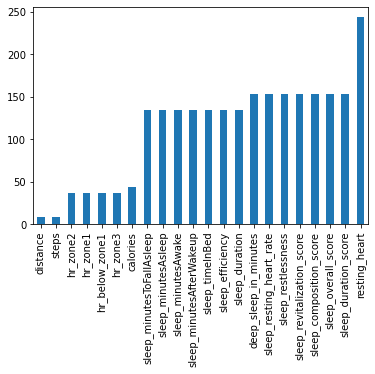

In [30]:
missing = cleaned_participants_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

23 attributes have missing values. Distance and steps have the lowest. Resting heart rate has the highest missing values. We might need to perform data imputation to fill out the missing values.

## 3. Relationship Analysis

### Data Relation

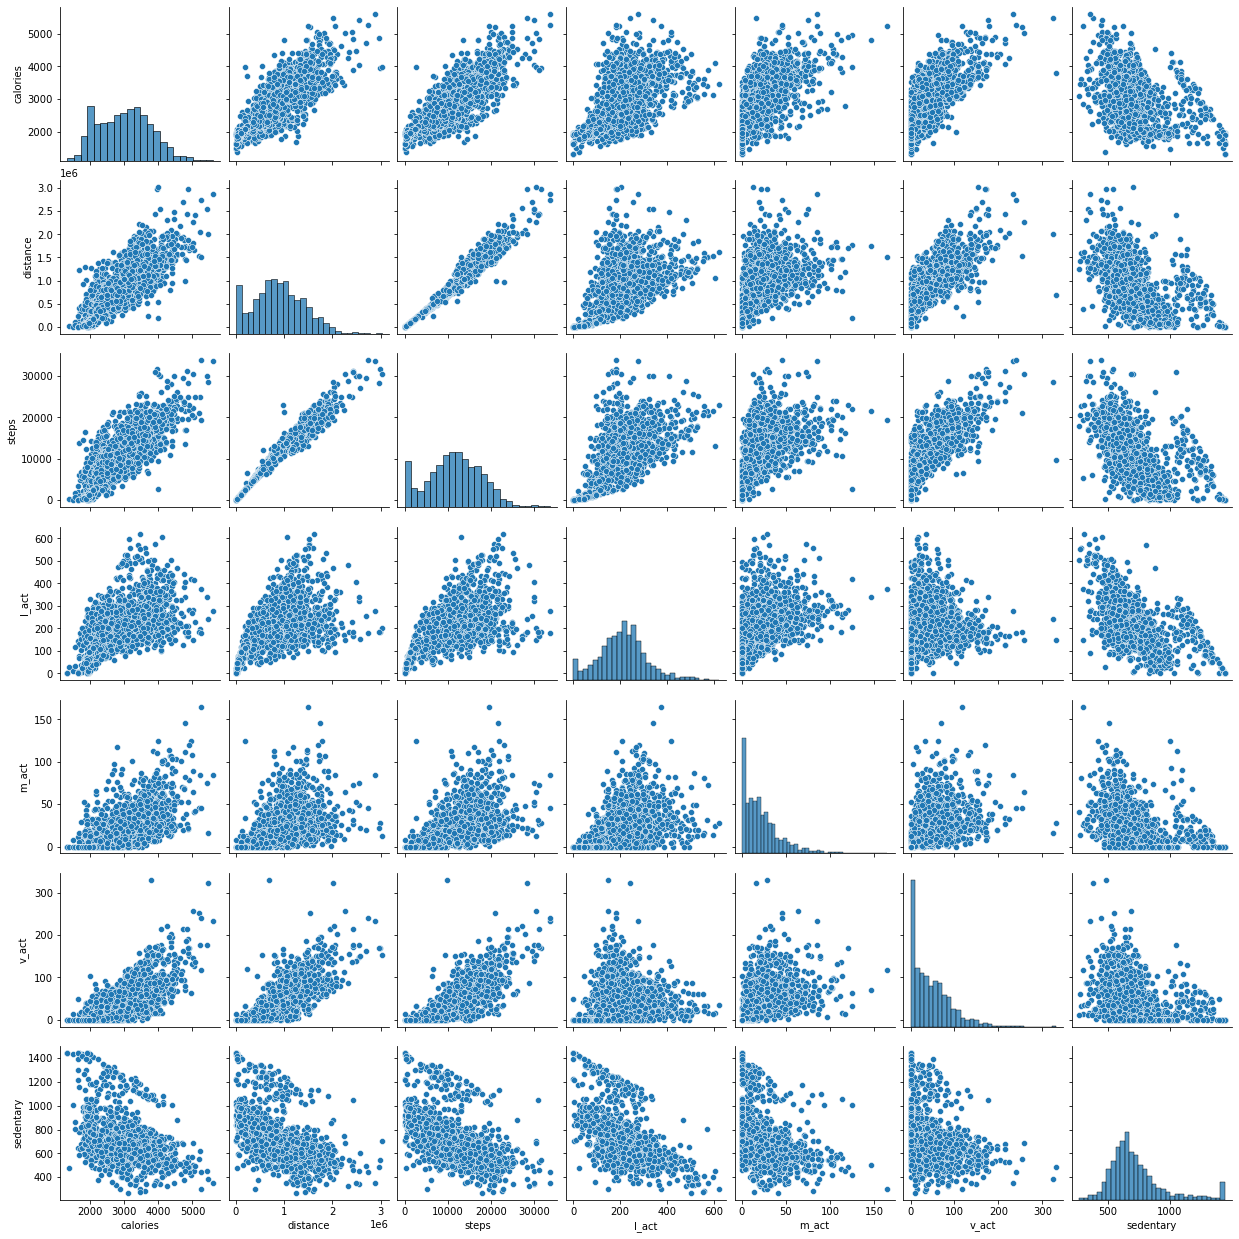

In [31]:
linear_graph =  sns.pairplot(data=cleaned_participants_data,
                  x_vars=['calories', 'distance', 'steps', 'l_act', 'm_act', 'v_act', 'sedentary'],
                  y_vars=['calories', 'distance', 'steps', 'l_act', 'm_act', 'v_act', 'sedentary'])



#### Linear Relation
1. There is a positive linear correlation in between <b>Calories, Distance, Steps</b>
2. There is a negative linear correlation between <b>Calories, Distance, Steps</b> and <b>Sedentary</b>

### Class Distribution

In [32]:
class_distribution_x = cleaned_participants_data.drop(['readiness'], axis=1)
class_distribution_y = cleaned_participants_data['readiness']

In [33]:
class_distribution_y.value_counts()

5.0     458
4.0     262
6.0     258
7.0     201
3.0     162
8.0      80
2.0      67
0.0      67
1.0      12
9.0       4
10.0      3
Name: readiness, dtype: int64

<AxesSubplot:ylabel='readiness'>

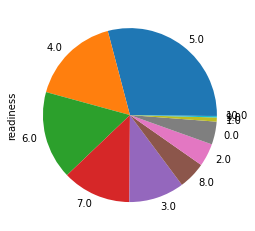

In [34]:
class_distribution_y.value_counts().plot.pie()

#### Imblanced Data...
1. Readiness <b>5.0</b> is the majority
2. Readiness <b>1.0, 9.0, 10.0</b> are the most minorities 

We might need to perform an oversamping or undersampling, to make the data more balance

### Find Correlated Features


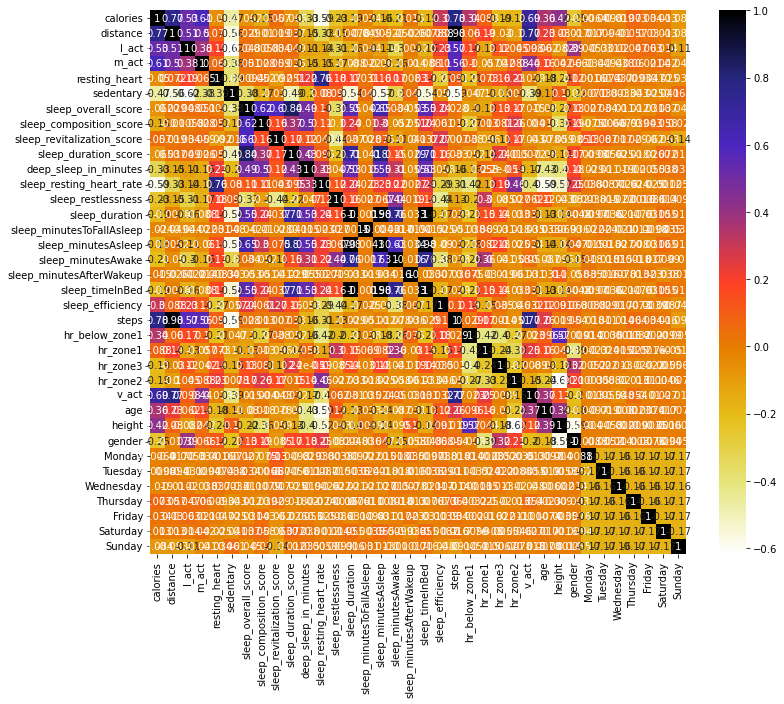

In [35]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = class_distribution_x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()



In [36]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [37]:
corr_features = correlation(class_distribution_x, 0.6)
corr_features

{'distance',
 'height',
 'm_act',
 'sedentary',
 'sleep_composition_score',
 'sleep_duration',
 'sleep_duration_score',
 'sleep_minutesAsleep',
 'sleep_minutesAwake',
 'sleep_resting_heart_rate',
 'sleep_revitalization_score',
 'sleep_timeInBed',
 'steps',
 'v_act'}

When we will use algorithms that works better with independent features like Gaussian Naive Bayes, we can select several attributes to be dropped before performing the algorithm.